In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('games.csv', index_col='id')

In [13]:
df.shape

(20058, 15)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20058 entries, TZJHLljE to N8G2JHGG
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rated            20058 non-null  int64 
 1   turns            20058 non-null  int64 
 2   victory_status   20058 non-null  int32 
 3   winner           20058 non-null  int32 
 4   increment_code   20058 non-null  object
 5   white_rating     20058 non-null  int64 
 6   black_rating     20058 non-null  int64 
 7   moves            20058 non-null  object
 8   opening_name     20058 non-null  object
 9   opening_initial  20058 non-null  object
dtypes: int32(2), int64(4), object(4)
memory usage: 2.2+ MB


In [126]:
df.isnull().sum()

rated              0
turns              0
victory_status     0
winner             0
increment_code     0
white_rating       0
black_rating       0
moves              0
opening_name       0
opening_initial    0
dtype: int64

In [127]:
from sklearn.preprocessing import LabelEncoder

categorical_column = ['rated', 'winner', 'victory_status']
                      

for i in categorical_column:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])
print(df.head())

          rated  turns  victory_status  winner increment_code  white_rating  \
id                                                                            
TZJHLljE      0     13               2       2           15+2          1500   
l1NXvwaE      1     16               3       0           5+10          1322   
mIICvQHh      1     61               1       2           5+10          1496   
kWKvrqYL      1     61               1       2           20+0          1439   
9tXo1AUZ      1     95               1       2           30+3          1523   

          black_rating                                              moves  \
id                                                                          
TZJHLljE          1191  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
l1NXvwaE          1261  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
mIICvQHh          1500  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
kWKvrqYL          1454  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 

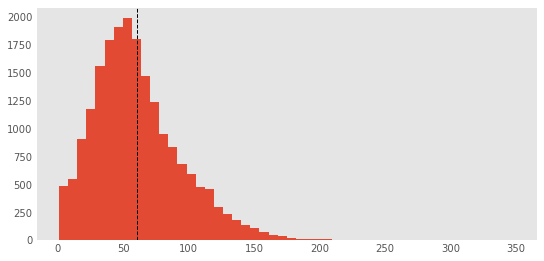

In [136]:
df['turns'].hist(figsize=(8, 4), bins=50, grid=False)
plt.axvline(df['turns'].mean(), color='k', linestyle='dashed', linewidth=1)

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

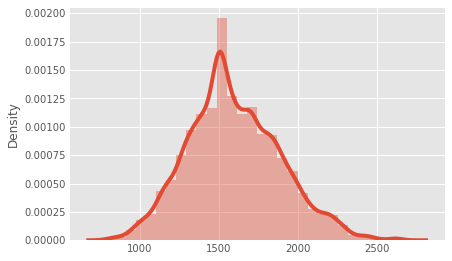

In [122]:
sns.distplot([df['white_rating']],kde=True,bins=30)

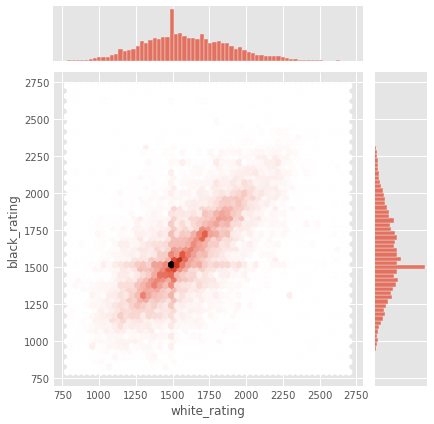

In [123]:
sns.jointplot(x='white_rating',y='black_rating',data=df,kind='hex')

<AxesSubplot:>

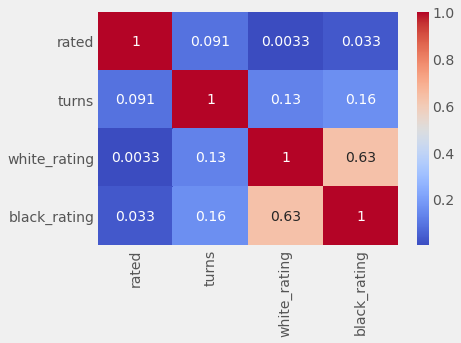

In [76]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [71]:
def delete_variations(s):
    i = 0
    try:
        while s[i] not in ":|," or i==len(s)-1:
            i+=1
    except:
        pass
    if i != len(s)-1:
        return s[:i]
    else:
        return s


df['opening_initial'] = df['opening_name'].apply(delete_variations)

In [137]:
from collections import Counter

def count_all_openings():
    var_counter = Counter()
    for element in df['opening_name']:
        element = element.replace('|', ':')
        variations = element.split(":")
        for variation in variations:
            var_counter.update([variation.strip()])
    return var_counter

def open_all(s):
    res = []
    words = s.replace("|", ":").split(":")
    for word in words:
        c = word
        if word[0] == " ":
            c = c[1:] 
        if word[len(word)-1] == " ":
            c = c[:len(word)-1]
        res.append(c)
    return res

<BarContainer object of 15 artists>

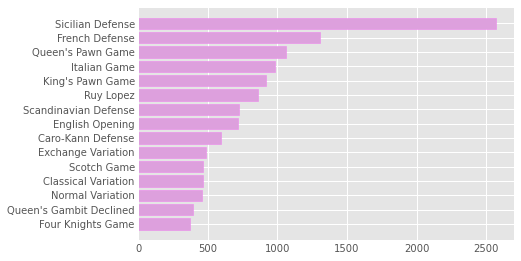

In [189]:
popularity = []
opening = []

for variation in count_all_openings().most_common(15):
    popularity.append(variation[1])
    opening.append(variation[0])

popularity.reverse()
opening.reverse()

plt.style.use("ggplot")
plt.barh(opening, popularity, color="plum", edgecolor="violet", log=False)

In [139]:
df['opening_initial'].value_counts()

Sicilian Defense       2573
French Defense         1306
Queen's Pawn Game      1059
Italian Game            981
King's Pawn Game        917
                       ... 
Australian Defense        1
Pterodactyl Defense       1
Petrov's Defense #5       1
Global Opening            1
Doery Defense             1
Name: opening_initial, Length: 180, dtype: int64

In [140]:
df.head(3)

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_name,opening_initial
id,,,,,,,,,,
TZJHLljE,0,13,2,2,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,Slav Defense: Exchange Variation,Slav Defense
l1NXvwaE,1,16,3,0,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense
mIICvQHh,1,61,1,2,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,King's Pawn Game: Leonardis Variation,King's Pawn Game


In [142]:
df.describe()

,rated,turns,victory_status,winner,white_rating,black_rating
count,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,0.805414,60.465999,2.150065,1.044571,1596.631868,1588.831987
std,0.395891,33.570585,1.014535,0.975038,291.253376,291.036126
min,0.000000,1.000000,0.000000,0.000000,784.000000,789.000000
25%,1.000000,37.000000,1.000000,0.000000,1398.000000,1391.000000
50%,1.000000,55.000000,3.000000,1.000000,1567.000000,1562.000000
75%,1.000000,79.000000,3.000000,2.000000,1793.000000,1784.000000
max,1.000000,349.000000,3.000000,2.000000,2700.000000,2723.000000


<BarContainer object of 2 artists>

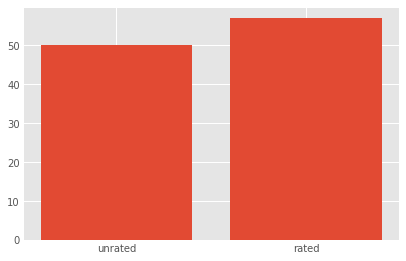

In [162]:
rated = df.groupby(by=['rated']).get_group(1)
unrated = df.groupby(by=['rated']).get_group(0)

status = ['unrated', 'rated']
nr_turns = [unrated['turns'].median(), rated['turns'].median()]

plt.bar(status, nr_turns)

b0:  [577.04998042]
b1:  [[0.63369774]]


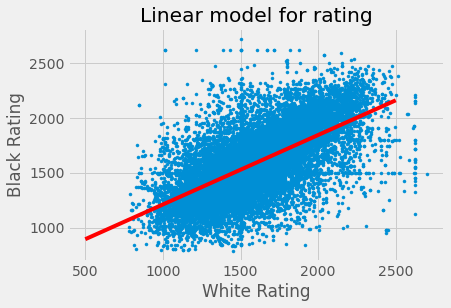

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

linear_reg = LinearRegression()

x = df.white_rating.values.reshape(-1,1)
y = df.black_rating.values.reshape(-1,1)

linear_reg.fit(x,y)

array = np.array([i for i in range(500,2500)]).reshape(-1,1)

b0 = linear_reg.intercept_
print('b0: ',b0)

b1 = linear_reg.coef_ 
print('b1: ',b1)

plt.title(label="Linear model for rating")
plt.style.use("fivethirtyeight")
plt.scatter(df.white_rating,df.black_rating, norm=0.1, marker=".")
plt.xlabel('White Rating')
plt.ylabel('Black Rating')
y_head = linear_reg.predict(array)
plt.plot(array, y_head, color = 'red')
plt.show()